In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
pip install --upgrade gspread


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import email
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import gspread

In [7]:
gc=gspread.service_account(filename="/kaggle/input/myproject3/myproject3.json")
  

In [8]:
worksheet=gc.open_by_key('1BcfNOO9hHzV5GQjtMOGUvgEtsQ1Bk646LviWuLl2qqo')

In [12]:
current_sheet=worksheet.worksheet("mails")
dict=current_sheet.get_all_records()

In [16]:
import pandas as pd
df=pd.DataFrame.from_dict(dict)

In [17]:
df.head()

,Message,Date,Subject,Sender
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>


In [19]:
# Function to update the DataFrame
def update_dataframe():
    data_dict = current_sheet.get_all_records()
    df2 = pd.DataFrame.from_dict(data_dict)
    return df

# Periodically update the DataFrame (you can use a scheduler or timer)
df2 = update_dataframe()
df2.head()

,Message,Date,Subject,Sender
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>


In [23]:
df=df.astype(str)

In [30]:
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        data = re.sub(r'http\S+|www\S+|https\S+', '', data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'

In [31]:
df['Message_New']=df['Message'].apply(clean_column)
df['Subject_New']=df['Subject'].apply(clean_column)

In [37]:
print(df['Message_New'])

0      we ran into a problem with one of your zaps   ...
1      hi anuradha\r  here are some of the latest opp...
2      bhavin mehta has accepted your invitation lets...
3      uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvlg...
4      aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalkk...
                             ...                        
495    email template \r \r  \r dvrbcqeovgpmakuwkdduv...
496    spotify premium \r premium free for  months \r...
497    dear learner  the solution for assignment  has...
498    doctype html\r html\r head\r head\r body\r psp...
499    watch the wheel of time new season now  watch ...
Name: Message_New, Length: 500, dtype: object


In [69]:
print(df['Message_New'].iloc[499])

watch the wheel of time new season now  watch now         the great hunt is on join the epic fantasy venture   though rand thought he destroyed the dark one evil is not gone from the  world threats new and very old seek out the young friends from the two  rivers now scattered over the world the woman who found and guided them  is now powerless to help and so they must find other sources of strength  in each other or themselves in the light or the dark watch now                     prime video provides occasional email updates about new and noteworthy  movies and tv shows we are sensitive to your time and remain committed to  limiting our emails to important news as well as critical information  about your account if you do not want to receive future emails of this  sort from prime video please modify your account settings here     this message is sent to you by the amazon entity noted here      amazoncom inc or its affiliates amazon prime prime video  twitch fire and all related logos 

In [52]:
df['Subject_New'].tail()

495                                     india indiaaaaaa
496                    dont miss  free months of premium
497    deep learning  iit ropar  solution for assignm...
498    your revised weekend plan book free mentorship...
499               watch the wheel of time new season now
Name: Subject_New, dtype: object

In [54]:
#Shape of dataframe
print(" Shape of training dataframe: ", df['Message_New'].shape)

 Shape of training dataframe:  (500,)


In [55]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (500, 6)


In [56]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0      Message              0              0.0
1         Date              0              0.0
2      Subject              0              0.0
3       Sender              0              0.0
4  Message_New              0              0.0
5  Subject_New              0              0.0


In [57]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:0000:01


In [62]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [63]:
# calculating polarity 
def sentiment_analyzer_score(sentence):
    score=analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [70]:
#testing the function
email  = "watch the wheel of time new season now  watch now         the great hunt is on join the epic fantasy venture   though rand thought he destroyed the dark one evil is not gone from the  world threats new and very old seek out the young friends from the two  rivers now scattered over the world the woman who found and guided them  is now powerless to help and so they must find other sources of strength  in each other or themselves in the light or the dark watch now                     prime video provides occasional email updates about new and noteworthy  movies and tv shows we are sensitive to your time and remain committed to  limiting our emails to important news as well as critical information  about your account if you do not want to receive future emails of this  sort from prime video please modify your account settings here     this message is sent to you by the amazon entity noted here      amazoncom inc or its affiliates amazon prime prime video  twitch fire and all related logos are trademarks of amazoncom inc or  its affiliates  please note that this email was sent to anuradhasudhiryeolegmailcom from  a notificationonly address that cant accept incoming emails please do  not reply to this message if you have any questions and wish to contact  us click here     reference"

In [71]:
print (sentiment_analyzer_score(email))

watch the wheel of time new season now  watch now         the great hunt is on join the epic fantasy venture   though rand thought he destroyed the dark one evil is not gone from the  world threats new and very old seek out the young friends from the two  rivers now scattered over the world the woman who found and guided them  is now powerless to help and so they must find other sources of strength  in each other or themselves in the light or the dark watch now                     prime video provides occasional email updates about new and noteworthy  movies and tv shows we are sensitive to your time and remain committed to  limiting our emails to important news as well as critical information  about your account if you do not want to receive future emails of this  sort from prime video please modify your account settings here     this message is sent to you by the amazon entity noted here      amazoncom inc or its affiliates amazon prime prime video  twitch fire and all related logos 

In [72]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['Message_New'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [we, ran, into, a, problem, with, one, of, you...
1    [hi, anuradha, here, are, some, of, the, lates...
2    [bhavin, mehta, has, accepted, your, invitatio...
3    [uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvl...
4    [aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalk...
Name: Message_New, dtype: object

In [73]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

121506 words total, with a vocabulary size of 10531


In [74]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('px', 4487),
 ('a', 2553),
 ('to', 2393),
 ('the', 2208),
 ('important', 2018),
 ('and', 1680),
 ('td', 1462),
 ('you', 1388),
 ('of', 1322),
 ('in', 1123),
 ('tr', 958),
 ('for', 957),
 ('this', 932),
 ('display', 901),
 ('your', 867),
 ('width', 853),
 ('block', 793),
 ('from', 730),
 ('fontsize', 730),
 ('is', 722),
 ('padding', 678),
 ('href', 668),
 ('none', 667),
 ('read', 639),
 ('span', 623),
 ('with', 614),
 ('div', 589),
 ('are', 579),
 ('table', 562),
 ('data', 524),
 ('h', 524),
 ('linkedin', 516),
 ('border', 505),
 ('color', 504),
 ('on', 497),
 ('tbody', 490),
 ('at', 473),
 ('lineheight', 445),
 ('textdecoration', 434),
 ('i', 433),
 ('fontweight', 433),
 ('we', 396),
 ('margin', 392),
 ('targetblank', 387),
 ('stylecolor', 385),
 ('that', 381),
 ('email', 379),
 ('borderradius', 372),
 ('img', 369),
 ('solid', 350),
 ('or', 346),
 ('textalign', 345),
 ('center', 343),
 ('styledisplay', 343),
 ('src', 332),
 ('stylewidth', 332),
 ('here', 329),
 ('min', 327),
 ('c', 3

**WORDCLOUD FOR FREQUENTLY APPEARING WORDS**

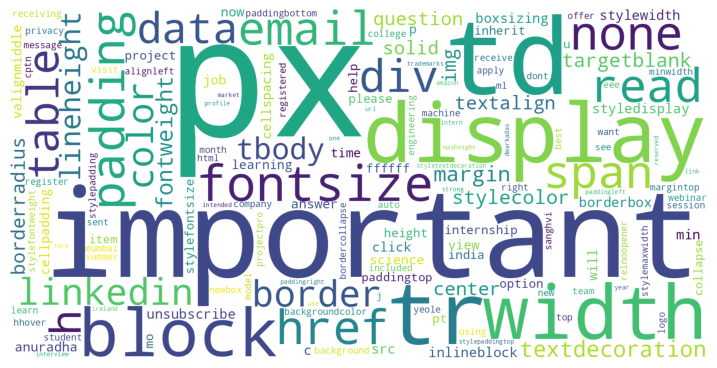

In [75]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']

for i in to_add:
    stopwords.add(i)

#Visualise Email Subject

wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(df['Message_New'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [77]:
df['scores'] = df['Message_New'].apply(lambda review: analyser.polarity_scores(review))
df.head()

,Message,Date,Subject,Sender,Message_New,Subject_New,description_lengths,scores
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>,we ran into a problem with one of your zaps ...,possible error on your gmailtogooglesheets zap,250,"{'neg': 0.149, 'neu': 0.771, 'pos': 0.08, 'com..."
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>,hi anuradha\r here are some of the latest opp...,anuradha new internships in theother thirds c...,416,"{'neg': 0.009, 'neu': 0.866, 'pos': 0.125, 'co..."
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...,bhavin mehta has accepted your invitation lets...,request accepted message your new connection,101,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp..."
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>,uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvlg...,last chance off on bestsellers,68,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp..."
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>,aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalkk...,combos combos extra off,38,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp..."


In [78]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Message,Date,Subject,Sender,Message_New,Subject_New,description_lengths,scores,compound
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>,we ran into a problem with one of your zaps ...,possible error on your gmailtogooglesheets zap,250,"{'neg': 0.149, 'neu': 0.771, 'pos': 0.08, 'com...",-0.9653
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>,hi anuradha\r here are some of the latest opp...,anuradha new internships in theother thirds c...,416,"{'neg': 0.009, 'neu': 0.866, 'pos': 0.125, 'co...",0.9919
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...,bhavin mehta has accepted your invitation lets...,request accepted message your new connection,101,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.9153
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>,uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvlg...,last chance off on bestsellers,68,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp...",-0.4767
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>,aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalkk...,combos combos extra off,38,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.7845


In [79]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)


df.head()

,Message,Date,Subject,Sender,Message_New,Subject_New,description_lengths,scores,compound,Sentiment
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>,we ran into a problem with one of your zaps ...,possible error on your gmailtogooglesheets zap,250,"{'neg': 0.149, 'neu': 0.771, 'pos': 0.08, 'com...",-0.9653,Negative
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>,hi anuradha\r here are some of the latest opp...,anuradha new internships in theother thirds c...,416,"{'neg': 0.009, 'neu': 0.866, 'pos': 0.125, 'co...",0.9919,Positive
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...,bhavin mehta has accepted your invitation lets...,request accepted message your new connection,101,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.9153,Positive
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>,uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvlg...,last chance off on bestsellers,68,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp...",-0.4767,Negative
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>,aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalkk...,combos combos extra off,38,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.7845,Positive


In [81]:
var1 = df.groupby('Sentiment').count()['Message_New'].reset_index().sort_values(by='Message_New',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.Message_New,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [83]:
df['temp_list'] = df['Message_New'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')

In [84]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

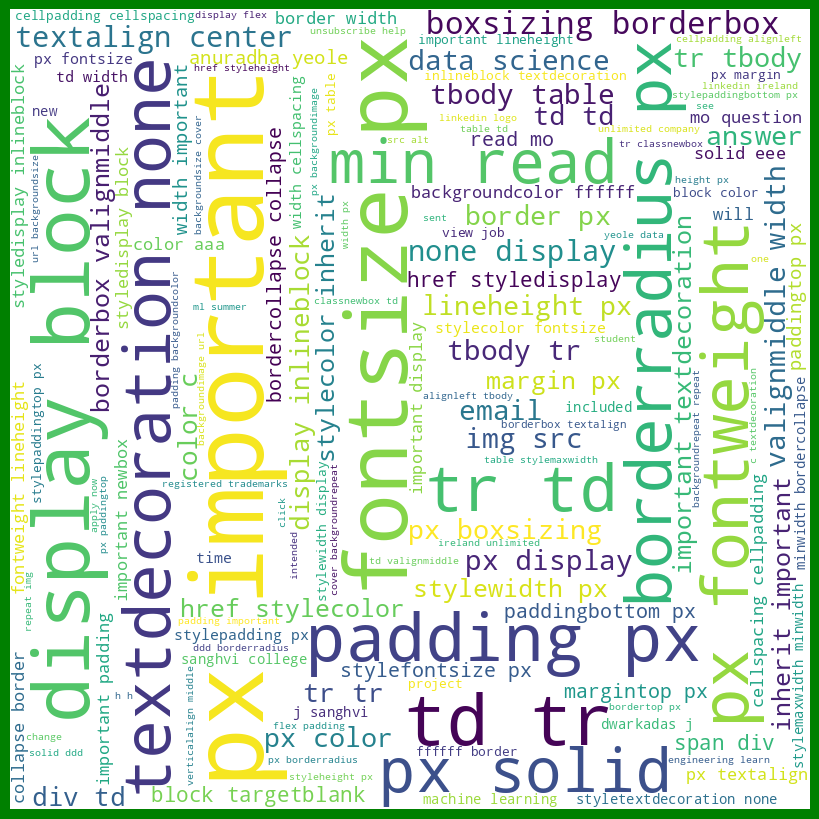

In [86]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.Message_New: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [87]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [88]:
email = "watch the wheel of time new season now  watch now         the great hunt is on join the epic fantasy venture   though rand thought he destroyed the dark one evil is not gone from the  world threats new and very old seek out the young friends from the two  rivers now scattered over the world the woman who found and guided them  is now powerless to help and so they must find other sources of strength  in each other or themselves in the light or the dark watch now                     prime video provides occasional email updates about new and noteworthy  movies and tv shows we are sensitive to your time and remain committed to  limiting our emails to important news as well as critical information  about your account if you do not want to receive future emails of this  sort from prime video please modify your account settings here     this message is sent to you by the amazon entity noted here      amazoncom inc or its affiliates amazon prime prime video  twitch fire and all related logos are trademarks of amazoncom inc or  its affiliates  please note that this email was sent to anuradhasudhiryeolegmailcom from  a notificationonly address that cant accept incoming emails please do  not reply to this message if you have any questions and wish to contact  us click here     reference"
TextBlob(email).sentiment 

Sentiment(polarity=0.019454545454545454, subjectivity=0.5336818181818183)

In [90]:
# Applying on dataset
df['TB_score']= df.Message_New.apply(lambda x: TextBlob(x).sentiment)
df.head()

,Message,Date,Subject,Sender,Message_New,Subject_New,description_lengths,scores,compound,Sentiment,temp_list,TB_score
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>,we ran into a problem with one of your zaps ...,possible error on your gmailtogooglesheets zap,250,"{'neg': 0.149, 'neu': 0.771, 'pos': 0.08, 'com...",-0.9653,Negative,"[we, ran, into, a, problem, with, one, of, you...","(-0.06477272727272729, 0.5102272727272728)"
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>,hi anuradha\r here are some of the latest opp...,anuradha new internships in theother thirds c...,416,"{'neg': 0.009, 'neu': 0.866, 'pos': 0.125, 'co...",0.9919,Positive,"[hi, anuradha, here, are, some, of, the, lates...","(0.008962208962208968, 0.39925412425412415)"
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...,bhavin mehta has accepted your invitation lets...,request accepted message your new connection,101,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.9153,Positive,"[bhavin, mehta, has, accepted, your, invitatio...","(0.2, 0.2)"
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>,uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvlg...,last chance off on bestsellers,68,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp...",-0.4767,Negative,[uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvl...,"(-0.07142857142857142, 0.14285714285714285)"
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>,aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalkk...,combos combos extra off,38,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.7845,Positive,[aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalk...,"(0.5, 0.5)"


In [91]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=a36cc1f506d1c69b2d89114f86ade4193d4533364aab8f44c72c863c4ce49dca
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex


In [96]:
from nrclex import NRCLex
email = NRCLex('I hope this message finds you well. I wanted to share some recent feedback regarding my experience with your logistics servicesIve been a loyal customer for some time and have generally been satisfied with your service. However, my recent shipment encountered a delay without proactive communication, and the packaging was slightly mishandled upon arrivalI value our business relationship and believe open communication is essential. I hope this feedback contributes to your ongoing improvements.Thank you for your attention.')
#Return affect dictionary
print(email.affect_dict)
#Return raw emotional counts
print("\n",email.raw_emotion_scores)
#Return highest emotions
print("\n", email.top_emotions)
#Return affect frequencies
print("\n",email.affect_frequencies)

{'hope': ['anticipation', 'joy', 'positive', 'surprise', 'trust'], 'share': ['anticipation', 'joy', 'positive', 'trust'], 'loyal': ['fear', 'joy', 'positive', 'surprise', 'trust'], 'customer': ['positive'], 'time': ['anticipation'], 'satisfied': ['joy', 'positive'], 'delay': ['anger', 'disgust', 'fear', 'negative', 'sadness'], 'communication': ['trust'], 'essential': ['positive'], 'ongoing': ['anticipation'], 'attention': ['positive']}

 {'anticipation': 5, 'joy': 5, 'positive': 8, 'surprise': 3, 'trust': 6, 'fear': 2, 'anger': 1, 'disgust': 1, 'negative': 1, 'sadness': 1}

 [('positive', 0.24242424242424243)]

 {'fear': 0.06060606060606061, 'anger': 0.030303030303030304, 'anticip': 0.0, 'trust': 0.18181818181818182, 'surprise': 0.09090909090909091, 'positive': 0.24242424242424243, 'negative': 0.030303030303030304, 'sadness': 0.030303030303030304, 'disgust': 0.030303030303030304, 'joy': 0.15151515151515152, 'anticipation': 0.15151515151515152}


In [93]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['Message_New'].apply(emotion)
df.head()

,Message,Date,Subject,Sender,Message_New,Subject_New,description_lengths,scores,compound,Sentiment,temp_list,TB_score,Emotion
0,We ran into a problem with one of your Zaps. ...,9/23/2023 14:48:54,[ALERT] Possible error on your gmailtogooglesh...,Zapier Alerts <alerts@mail.zapier.com>,we ran into a problem with one of your zaps ...,possible error on your gmailtogooglesheets zap,250,"{'neg': 0.149, 'neu': 0.771, 'pos': 0.08, 'com...",-0.9653,Negative,"[we, ran, into, a, problem, with, one, of, you...","(-0.06477272727272729, 0.5102272727272728)",positive
1,"Hi Anuradha,\r\n Here are some of the latest o...",9/23/2023 18:28:06,"Anuradha, new internships in TheOther 2 Thirds...",Internshala <student@internshala.com>,hi anuradha\r here are some of the latest opp...,anuradha new internships in theother thirds c...,416,"{'neg': 0.009, 'neu': 0.866, 'pos': 0.125, 'co...",0.9919,Positive,"[hi, anuradha, here, are, some, of, the, lates...","(0.008962208962208968, 0.39925412425412415)",positive
2,Bhavin Mehta has accepted your invitation. Let...,9/23/2023 18:08:39,Request accepted: message your new connection,Bhavin Mehta via LinkedIn <invitations@linkedi...,bhavin mehta has accepted your invitation lets...,request accepted message your new connection,101,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.9153,Positive,"[bhavin, mehta, has, accepted, your, invitatio...","(0.2, 0.2)",positive
3,<http://panela.nykaafashion.com/gtrack?clienti...,9/23/2023 17:39:24,LAST CHANCE: 30% off on bestsellers ✨❤️‍🔥,Nykaa Fashion <updates@nykaafashion.com>,uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvlg...,last chance off on bestsellers,68,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp...",-0.4767,Negative,[uqbvaqdtabxtfbfrrnvulqehahwlqtfwdgbulrrclxpvl...,"(-0.07142857142857142, 0.14285714285714285)",negative
4,<http://lnk.nykaa.com/gtrack?clientid=85303&ul...,9/23/2023 17:17:59,Combos? 🤩 Combos + EXTRA 10% OFF? 🤩🤩🤩,Nykaa <noreply@nykaa.com>,aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalkk...,combos combos extra off,38,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.7845,Positive,[aqilcwcmuaeyvurxwxexaleluzevaxaertrxgtdqjvalk...,"(0.5, 0.5)",positive


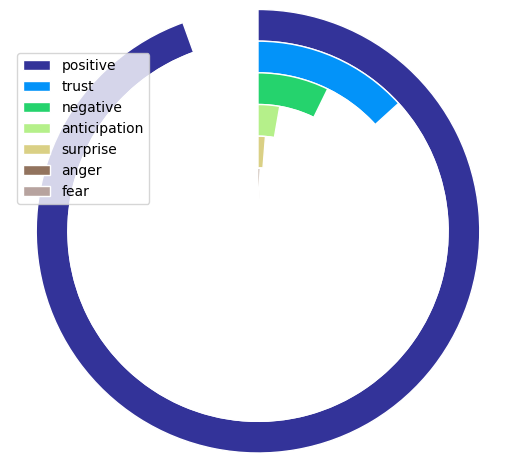

In [94]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

#### 

In [100]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Load the pretrained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Example text
text = "there was default in packaging"

# Analyze sentiment
result = nlp(text)

# Print the sentiment prediction
print(f"Text: {text}")
print(f"Sentiment: {result[0]['label']}, Score: {result[0]['score']}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: there was default in packaging
Sentiment: LABEL_0, Score: 0.5611793994903564
